<a href="https://colab.research.google.com/github/cowsilver57/Project/blob/main/%EB%9E%9C%EB%94%A9%ED%81%B4%EB%9F%BD2_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/lending_club(original).csv')

# 2. 전처리

## 2-1. 데이터 확인

In [25]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## 2-2. 결측치 제거

In [27]:
data.dropna(subset=['revol_util'], inplace=True)
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   emp_title             372338 non-null  object 
 7   emp_length            376929 non-null  object 
 8   home_ownership        395219 non-null  object 
 9   annual_inc            395219 non-null  float64
 10  verification_status   395219 non-null  object 
 11  issue_d               395219 non-null  object 
 12  loan_status           395219 non-null  object 
 13  purpose               395219 non-null  object 
 14  title                 393465 non-null  object 
 15  

## 2-3. 이상치 제거

### dti(LC 제외, 총 부채 상환 비율) -> 11개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x7947e83e7970>,
 'caps': [<matplotlib.lines.Line2D at 0x7947e83e7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7947e83e4e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7947e83e57e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7947e83e5d50>],
 'means': []}

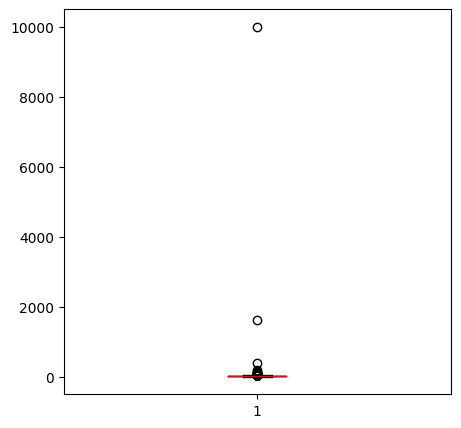

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['dti'], medianprops=medianprops)

In [30]:
Q1 = data['dti'].quantile(q=0.25)
Q3 = data['dti'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['dti']>upper) | (data['dti']<lower)]))

outliers = data.loc[(data['dti']>upper) | (data['dti']<lower), 'dti'].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  11


### open_acc(활성화 되어 있는 대출 계좌) -> 88개

{'whiskers': [<matplotlib.lines.Line2D at 0x7947e15a3bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7947e15c0130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7947e15a3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7947e15c0670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7947e15c0910>],
 'means': []}

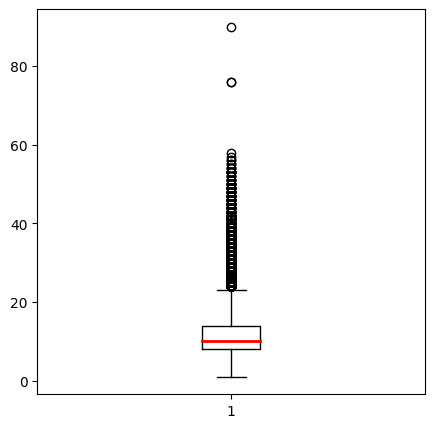

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['open_acc'], medianprops=medianprops)

In [32]:
Q1 = data['open_acc'].quantile(q=0.25)
Q3 = data['open_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)].index

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  88


### pub_rec (묶여있는 계좌 수) → 2개 제거

Text(0.5, 1.0, 'Before Outlier Removal')

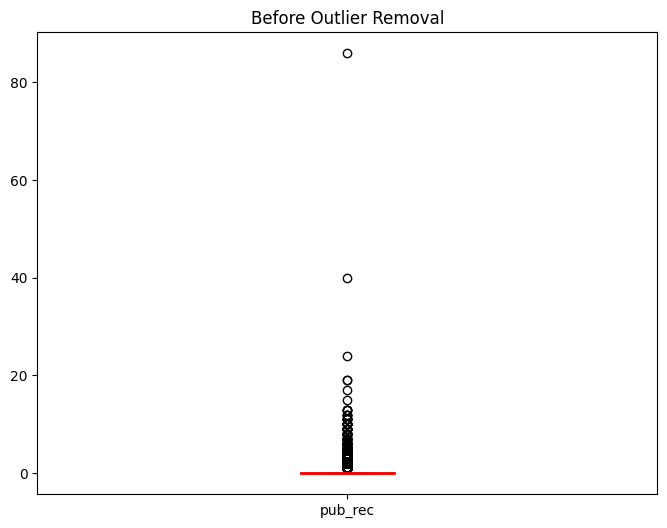

In [33]:
import matplotlib.pyplot as plt

# plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 6))

medianprops = {'linewidth':2, 'color':'r'}
label = ['pub_rec']
ax.boxplot(data['pub_rec'], medianprops=medianprops, labels=label)
ax.set_title('Before Outlier Removal')

In [34]:
Q1 = data['pub_rec'].quantile(q=0.25)
Q3 = data['pub_rec'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

#이상치 값 정의
outliers = data.loc[(data['pub_rec']>upper) | (data['pub_rec']<lower)]

print('극단 이상치 개수: ', len(outliers))

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='pub_rec', ascending=False).head(2)
top_outliers['pub_rec']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

극단 이상치 개수:  57724


### revol_bal (revolving 한도) → 1,136개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x7947ef633430>,
 'caps': [<matplotlib.lines.Line2D at 0x7947e1632f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7947e1632d40>],
 'medians': [<matplotlib.lines.Line2D at 0x7947e1633460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7947e1633700>],
 'means': []}

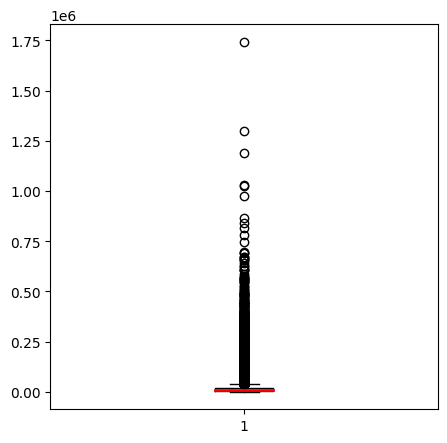

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_bal'], medianprops=medianprops)

In [36]:
Q1 = data['revol_bal'].quantile(q=0.25)
Q3 = data['revol_bal'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (10*IQR)
lower = Q1 - (10*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1136


### revol_util (revolving 한도 내에서 사용한 비율) → 1개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x7947f18c2aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7947f18c2fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7947f18c2800>],
 'medians': [<matplotlib.lines.Line2D at 0x7947f18c3520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7947f18c37c0>],
 'means': []}

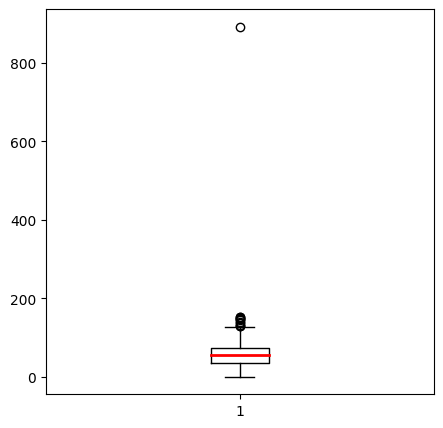

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_util'], medianprops=medianprops)

In [38]:
Q1 = data['revol_util'].quantile(q=0.25)
Q3 = data['revol_util'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 3*IQR
lower = Q1 - 3*IQR

print('극단 이상치 개수: ', len(data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1


최종 확인

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393981 entries, 0 to 393980
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393981 non-null  float64
 1   term                  393981 non-null  object 
 2   int_rate              393981 non-null  float64
 3   installment           393981 non-null  float64
 4   grade                 393981 non-null  object 
 5   sub_grade             393981 non-null  object 
 6   emp_title             371166 non-null  object 
 7   emp_length            375737 non-null  object 
 8   home_ownership        393981 non-null  object 
 9   annual_inc            393981 non-null  float64
 10  verification_status   393981 non-null  object 
 11  issue_d               393981 non-null  object 
 12  loan_status           393981 non-null  object 
 13  purpose               393981 non-null  object 
 14  title                 392239 non-null  object 
 15  

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393981 entries, 0 to 393980
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393981 non-null  float64
 1   term                  393981 non-null  object 
 2   int_rate              393981 non-null  float64
 3   installment           393981 non-null  float64
 4   grade                 393981 non-null  object 
 5   sub_grade             393981 non-null  object 
 6   emp_title             371166 non-null  object 
 7   emp_length            375737 non-null  object 
 8   home_ownership        393981 non-null  object 
 9   annual_inc            393981 non-null  float64
 10  verification_status   393981 non-null  object 
 11  issue_d               393981 non-null  object 
 12  loan_status           393981 non-null  object 
 13  purpose               393981 non-null  object 
 14  title                 392239 non-null  object 
 15  

## 2-4. 명목형 변수 인코딩

### terms (기간)
* 위에서 이미 실행

### sub_grade (세부 등급)

In [41]:
grades = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
          'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

# 각 등급에 부여할 값 생성
values = [34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
          16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# 등급과 값의 매핑을 딕셔너리로 생성
grade_to_value = dict(zip(grades, values))

# '등급' 컬럼을 매핑하여 새로운 '값' 컬럼 생성
data['sub_grade'] = data['sub_grade'].map(grade_to_value)

# 결과 출력
print(data.head())

   loan_amnt        term  int_rate  installment grade  sub_grade  \
0    10000.0   36 months     11.44       329.48     B         26   
1     8000.0   36 months     11.99       265.68     B         25   
2    15600.0   36 months     10.49       506.97     B         27   
3     7200.0   36 months      6.49       220.65     A         33   
4    24375.0   60 months     17.27       609.33     C         20   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1   

### home_ownership(주택 소유 상태: 자가, 임대 등)
- 주택을 보유하고 있는 경우에만 가중치 부여

In [42]:
from sklearn.preprocessing import LabelEncoder

data['home_ownership'].unique()

label_mapping = {'OWN':1, 'RENT':0, 'MORTGAGE':0, 'OTHER':0, 'ANY':0, 'NONE':0}
data['home_ownership'] = data['home_ownership'].map(label_mapping)
print(data['home_ownership'])

0         0
1         0
2         0
3         0
4         0
         ..
393976    0
393977    0
393978    0
393979    0
393980    0
Name: home_ownership, Length: 393981, dtype: int64


### verification_status(대출자의 소득 검증 상태)
- 'Not Verified': 0
- 'Source Verified': 1
- 'Verified’: 2

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['verification_status'])
data['verification_status'] = encoder.transform(data['verification_status'])

### loan_status (대출 현황:완납, 체납)
* Fully paid: 1
* Charged Off: 0


In [44]:
loan_status_mapping = {'Fully Paid':1, 'Charged Off':0}
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

### address (차용인 주소)
* get_dummies를 활용

1. Zipcode 생성

In [45]:
import re

# 우편번호 추출 함수 정의
def extract_zipcode(address):
    if isinstance(address, str):
        zipcode = re.search(r'\b\d{5}\b', address)
        if zipcode:
            return zipcode.group()
    return None

# 데이터프레임에 적용하여 우편번호 추출
data['Zipcode'] = data['address'].apply(extract_zipcode)

print(data['Zipcode'])

0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
393976    12951
393977    05113
393978    70466
393979    29597
393980    48052
Name: Zipcode, Length: 393981, dtype: object


2. Zipcode에서 첫 번째 숫자를 추출해 낸 address_code 생성

In [46]:
data['address_code'] = data['Zipcode'].str[0]
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Zipcode,address_code
0,10000.0,36 months,11.44,329.48,B,26,Marketing,10+ years,0,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690,2
1,8000.0,36 months,11.99,265.68,B,25,Credit analyst,4 years,0,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113,0
2,15600.0,36 months,10.49,506.97,B,27,Statistician,< 1 year,0,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",87025,8
3,7200.0,36 months,6.49,220.65,A,33,Client Advocate,6 years,0,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813,0
4,24375.0,60 months,17.27,609.33,C,20,Destiny Management Inc.,9 years,0,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60 months,10.99,217.38,B,26,licensed bankere,2 years,0,40000.0,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",12951,1
393977,21000.0,36 months,12.29,700.42,C,24,Agent,5 years,0,110000.0,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",05113,0
393978,5000.0,36 months,9.99,161.32,B,29,City Carrier,10+ years,0,56500.0,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",70466,7
393979,21000.0,60 months,15.31,503.02,C,23,"Gracon Services, Inc",10+ years,0,64000.0,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",29597,2


3. address_code를 get_dummies를 활용하여 인코딩

In [47]:
# 'address_code' 열의 값을 더미 변수로 변환하고 컬럼 이름에 'address'를 prefix로 붙임
dummy_address = pd.get_dummies(data['address_code'], prefix='address', dtype=int)

print(dummy_address.head())

   address_0  address_1  address_2  address_3  address_4  address_5  \
0          0          0          1          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   address_6  address_7  address_8  address_9  
0          0          0          0          0  
1          0          0          0          0  
2          0          0          1          0  
3          0          0          0          0  
4          0          0          0          0  


In [48]:
combined_data = pd.concat([data, dummy_address], axis=1)
combined_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,address_0,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9
0,10000.0,36 months,11.44,329.48,B,26,Marketing,10+ years,0,117000.0,...,0,0,1,0,0,0,0,0,0,0
1,8000.0,36 months,11.99,265.68,B,25,Credit analyst,4 years,0,65000.0,...,1,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,27,Statistician,< 1 year,0,43057.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36 months,6.49,220.65,A,33,Client Advocate,6 years,0,54000.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C,20,Destiny Management Inc.,9 years,0,55000.0,...,0,1,0,0,0,0,0,0,0,0


### application_type (공동 대출 or 개인 대출 or 원천징수)
* get_dummies를 활용

In [49]:
dummy_app_type = pd.get_dummies(data['application_type'], prefix='app_type', dtype=int)
dummy_app_type.head()

,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [50]:
fn_combined_data = pd.concat([combined_data, dummy_app_type], axis=1)
fn_combined_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,address_3,address_4,address_5,address_6,address_7,address_8,address_9,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
0,10000.0,36 months,11.44,329.48,B,26,Marketing,10+ years,0,117000.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36 months,11.99,265.68,B,25,Credit analyst,4 years,0,65000.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36 months,10.49,506.97,B,27,Statistician,< 1 year,0,43057.0,...,0,0,0,0,0,1,0,0,1,0
3,7200.0,36 months,6.49,220.65,A,33,Client Advocate,6 years,0,54000.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60 months,17.27,609.33,C,20,Destiny Management Inc.,9 years,0,55000.0,...,0,0,0,0,0,0,0,0,1,0


### 불필요한 컬럼 제거 (42개 -> 29개)

In [51]:
COL_DEL = ['grade', 'emp_title', 'emp_length', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address', 'Zipcode', 'mort_acc', 'address_code']

In [52]:
#1. grade
fn_combined_data.drop('grade', axis=1, inplace=True)

#2. emp_title
fn_combined_data.drop('emp_title', axis=1, inplace=True)

#3. emp_length
fn_combined_data.drop('emp_length', axis=1, inplace=True)

#4. issue_d(날짜 데이터 사용 X로 칼럼 삭제)
fn_combined_data.drop('issue_d', axis=1, inplace=True)

#5. purpose
fn_combined_data.drop('purpose', axis=1, inplace=True)

#6. title
fn_combined_data.drop('title', axis=1, inplace=True)

#7. earliest_cr_line
fn_combined_data.drop('earliest_cr_line', axis=1, inplace=True)

#8. initial_list_status
fn_combined_data.drop('initial_list_status', axis=1, inplace=True)

#9. application_type
fn_combined_data.drop('application_type', axis=1, inplace=True)

#10. address
fn_combined_data.drop('address', axis=1, inplace=True)

#11. Zipcode
fn_combined_data.drop('Zipcode', axis=1, inplace=True)

#12. mort_acc
fn_combined_data.drop('mort_acc', axis=1, inplace=True)

#13. mort_acc
fn_combined_data.drop('address_code', axis=1, inplace=True)

In [53]:
fn_combined_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'address_0', 'address_1', 'address_2',
       'address_3', 'address_4', 'address_5', 'address_6', 'address_7',
       'address_8', 'address_9', 'app_type_DIRECT_PAY', 'app_type_INDIVIDUAL',
       'app_type_JOINT'],
      dtype='object')

In [54]:
fn_combined_data.to_csv('preprocessed_data.csv', index=False)